<a href="https://colab.research.google.com/github/SyedT1/MLZoomcamp_2023/blob/main/homeworks/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'


In [30]:
!wget $url

--2023-09-26 05:57:05--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2023-09-26 05:57:05 (34.2 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [31]:
cols = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [32]:
import pandas as pd
import numpy as np
df = pd.read_csv('housing.csv')

In [33]:
df_n = df[cols].copy()

# Q1. There's one feature with missing values. What is it?
# A: total_bedrooms

In [34]:
df_n.isna().sum() > 0

latitude              False
longitude             False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
dtype: bool

# Q2. What's the median (50% percentile) for variable 'population'?
# A: 1195 (my answer is 1166 which is quite close)

In [35]:
df_n['population'].median()

1166.0

<Axes: ylabel='Count'>

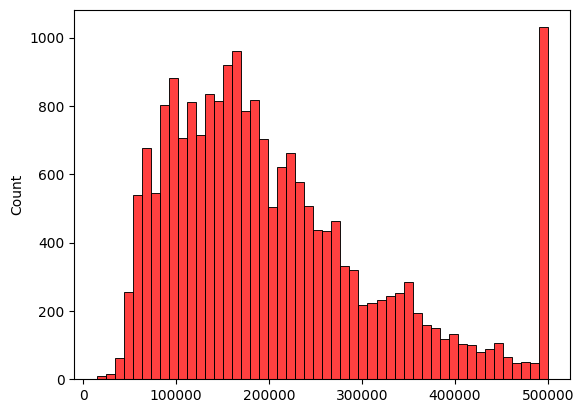

In [70]:

d = df_n['median_house_value'].values
import seaborn
sb.histplot(d,color='red',bins=50)

In [36]:
df_n.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [45]:
from sklearn.utils import shuffle
import random
random.seed(42)
shuffled_df = df_n.sample(frac=1, random_state=42)
shuffled_df.reset_index(drop=True, inplace=True)
shuffled_df.head(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.34,-122.04,25.0,1994.0,287.0,704.0,283.0,7.7799,447300.0
1,38.38,-122.82,27.0,2565.0,479.0,1227.0,467.0,4.5132,259900.0
2,34.44,-119.73,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0
3,33.94,-117.28,10.0,972.0,212.0,773.0,219.0,1.3125,135700.0
4,37.75,-122.43,52.0,1970.0,495.0,871.0,474.0,4.0625,355600.0


In [46]:
n = int(len(shuffled_df) * 0.2)

In [47]:
df_train = shuffled_df[:n]
df_val = shuffled_df[n:n+n]
df_test = shuffled_df[n+n:]

In [60]:
shuffled_df['median_house_value_log'] = shuffled_df['median_house_value'].apply(lambda x:np.log1p(x))

<Axes: ylabel='Count'>

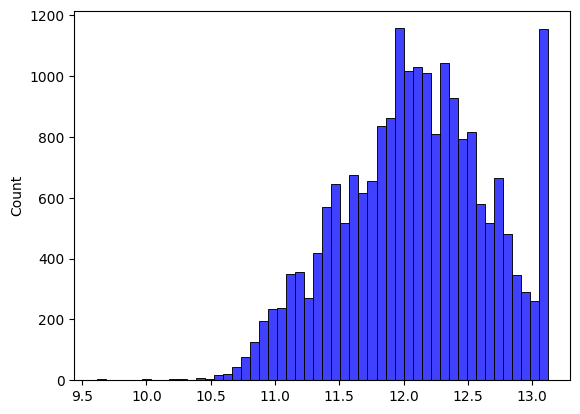

In [65]:
import seaborn as sb
sb.histplot(shuffled_df['median_house_value_log'].values,color='blue',bins=50)

In [62]:
shuffled_df['total_bedrooms'] = shuffled_df['total_bedrooms'].fillna(0)

In [64]:
df_train = shuffled_df[:n]
df_val = shuffled_df[n:n+n]
df_test = shuffled_df[n+n:]

In [72]:
y_train = df_train['median_house_value_log'].values

In [74]:
def prepare_X(df):
  df = df.copy()
  cols = ['housing_median_age',
  'total_rooms','total_bedrooms']
  return df[cols].values


array([[  25., 1994.,  287.],
       [  27., 2565.,  479.],
       [  38., 1729.,    0.],
       ...,
       [  14., 3223.,  484.],
       [  47., 4234.,    0.],
       [  19., 1708.,  291.]])

In [75]:
df_train.head(10)
X_train = prepare_X(df_train)

In [79]:
def train_linear_regression(X,y):
    X = np.column_stack([np.ones(X.shape[0]),X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    res = XTX_inv.dot(X.T).dot(y)
    return res[0],res[1:]


In [81]:
w0,w = train_linear_regression(X_train,y_train)
y_pred = X_train.dot(w)

In [82]:
def rme(y,y_pred):
    s = y - y_pred
    sq_s = s ** 2
    mse = sq_s.mean()
    return np.sqrt(mse)

In [83]:
rme(y_train,y_pred)

11.754099481036043